In [35]:
import sys
import numpy as np

from shapely.affinity import translate
from shapely import unary_union

sys.path.insert(1, '/Users/neoh/Documents/git/eeroqlab/')
#sys.path.insert(1, '/Users/helium/Documents/git/eeroqlab/')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [31]:
from zeroheliumkit import Anchor, MultiAnchor, GeomCollection, SuperStructure, Structure
from zeroheliumkit import PinchGate, Square, Rectangle, ArbitraryLine, Taper, ElbowLine, SigmoidLine
from zeroheliumkit.src.plotting import *

colorlist = [BLUE, YELLOW2, RED, GREEN, GRAY]

0.0


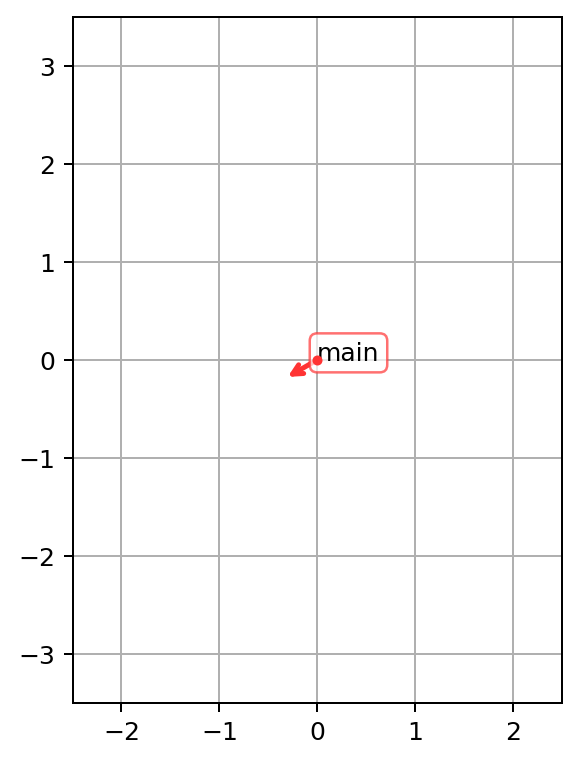

In [4]:
p = Anchor((0,0), 10, "main")
p.rotate(920)
print(p.x)

fig = plt.figure(figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=(0,0), dxdy=[5, 7])
p.plot(ax=ax, color=RED)

plt.grid()
plt.gca().set_aspect('equal')
plt.show()

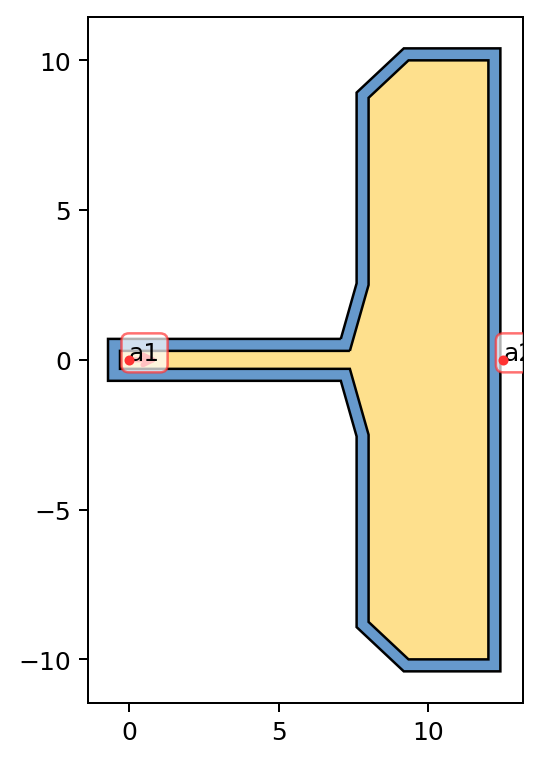

In [8]:
pg = PinchGate(arm_w = 0.6, 
               arm_l = 8, 
               length = 20, 
               width = 4)
pgate_base = GeomCollection(layers={"top": pg,
                                    "gnd": pg.buffer(0.4, join_style="mitre"),
                                    "anchorsmod": MultiAnchor([Anchor((0,0), 0, "a1"), Anchor((8 + 4 + 0.5, 0), 0, "a2")])})

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
pgate_base.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist)
plt.gca().set_aspect('equal')
plt.show()

In [9]:
pgate_base.add_anchor([Anchor((5,5), 56, "b1"), Anchor((5,-5), -56, "b2")])
pgate_base.rotate(49)

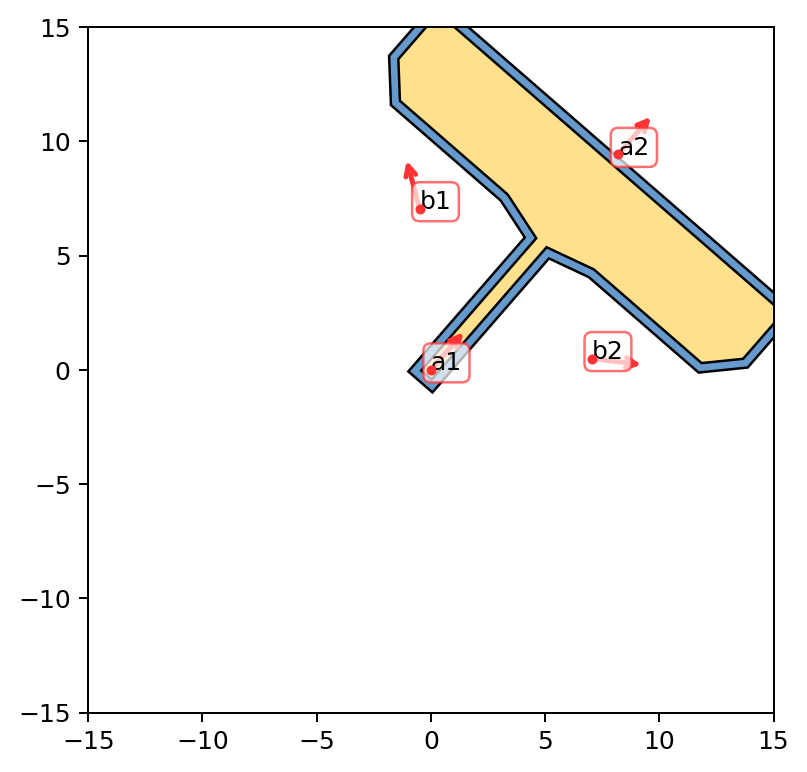

In [10]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[30,30])
pgate_base.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

In [11]:
pgate_base.get_anchor("a1").properties

-----  ----------  ---------
label  coords      direction
a1     (0.0, 0.0)  49.0
-----  ----------  ---------


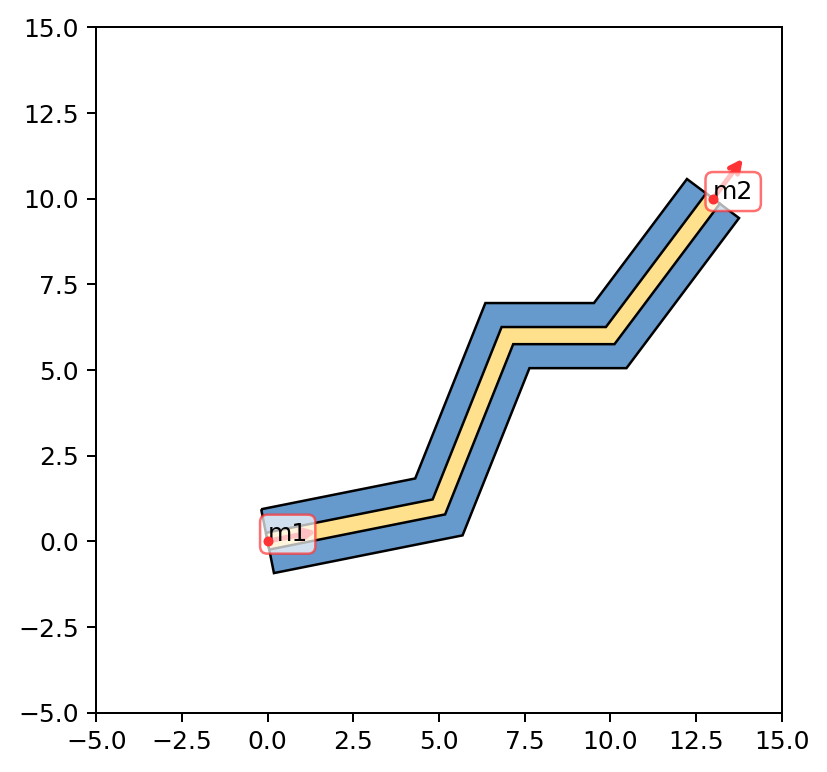

In [15]:
pts = [(0,0), (5,1), (7,6), (10,6), (13,10)]
w1 = np.asarray([0.5, 0.6, 0.7, 0.8, 0.9])
g1 = np.asarray([0.1, 1.2, 0.3, 0.4, 0.5]) * 2
ll = {"l1": 0.5, "l2": 1.9}

EL = ArbitraryLine(pts, ll, ("m1", "m2"))

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[5,5], dxdy=[20,20])
EL.plot(ax=ax, layer=["l2", "l1", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

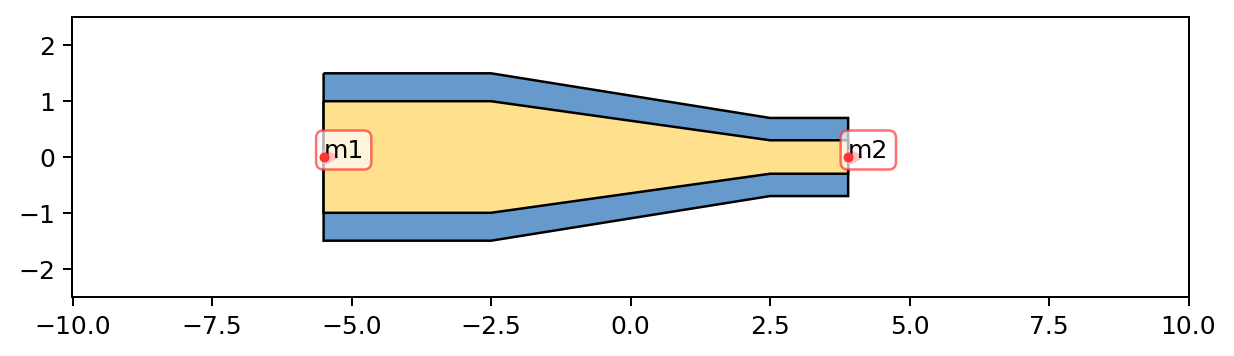

In [20]:
ltp = {"top": (2,0.6), "gnd": (2 + 1,0.6 + 2*0.4)}
TP = Taper(5, ltp, ("m1", "m2"))

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[20,5])
TP.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

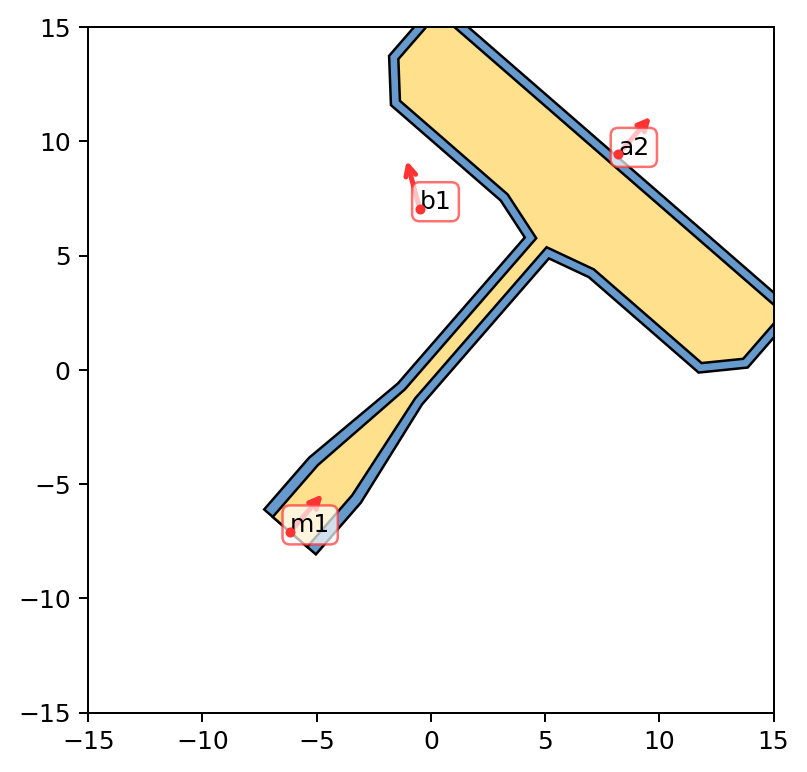

In [21]:
pgate = Structure()

pgate.append(pgate_base)
pgate.append(TP, anchoring=("a1","m2"), direction_snap=True)
pgate.remove_anchor(["m2","a1","b2"])

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[30,30])
pgate.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

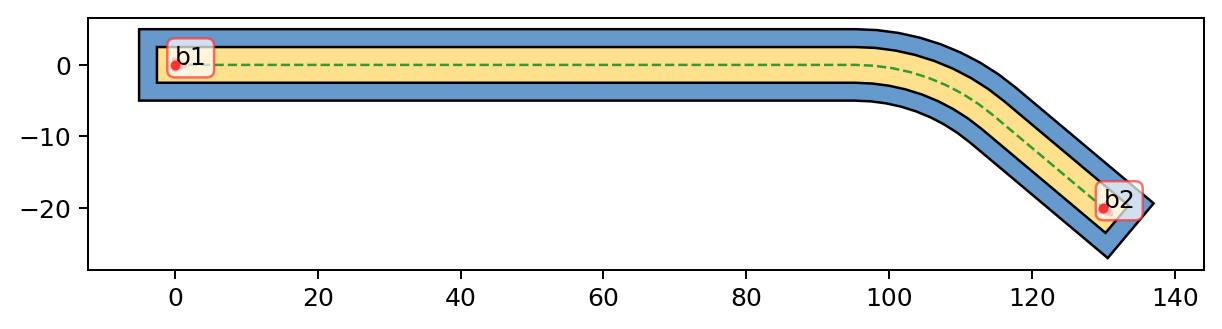

In [25]:
layer_info = {"metal": 5,
              "etch": 10}

p1 = Anchor((0, 0), 90)
p2 = Anchor((30, 30), 0)

p3 = Anchor((0, 0), 0)
p4 = Anchor((130, -20), -40)

p5 = Anchor((300.0, 150.0), 0)
p6 = Anchor((371.6186, 161.059 + 1), 1.909152433002987 * 40)

route = ElbowLine(p3, p4, radius=30, num_segments=9, layers=layer_info, alabel=("b1", "b2"))
#route.rotate(-53)
#route.get_anchor("b2").properties

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
#set_limits(ax=ax, coor=[0,0], dxdy=[150,80])
route.plot(ax=ax, layer=["etch", "metal", "anchorsmod", "skeletone"], color=colorlist)
plt.gca().set_aspect('equal')
plt.show()

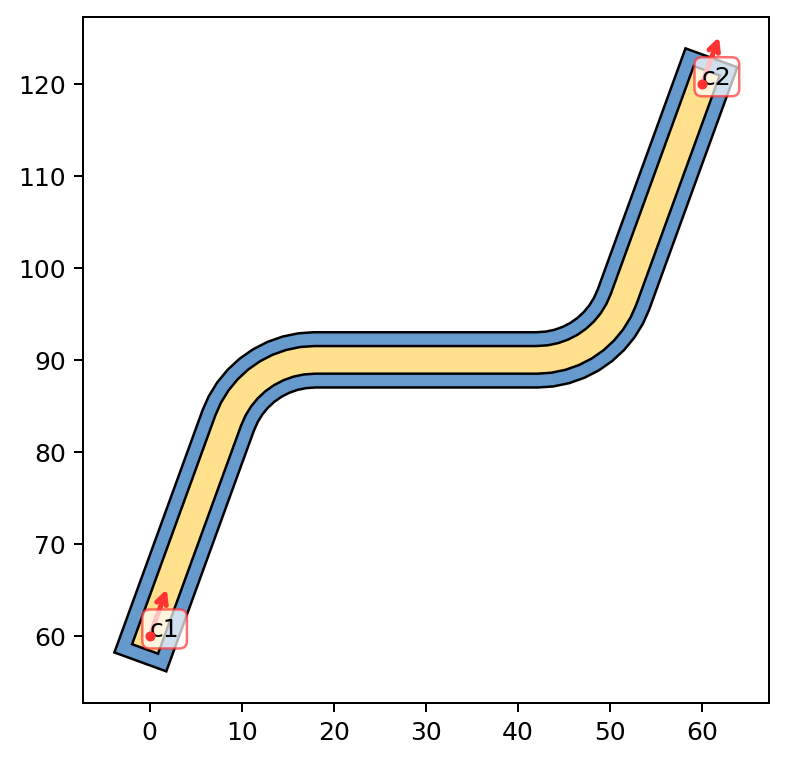

In [26]:
layer_info = {"top": 3,
              "gnd": 6}

p1 = Anchor(Point(0,0), 70)
p2 = Anchor(Point(60,60), 70)
r2 = SigmoidLine(p1, p2, 0, radius=10, num_segments=10, layers=layer_info, alabel=("c1", "c2"))
r2.moveby(xy=(0, 60))

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
r2.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist)
plt.gca().set_aspect('equal')
plt.show()

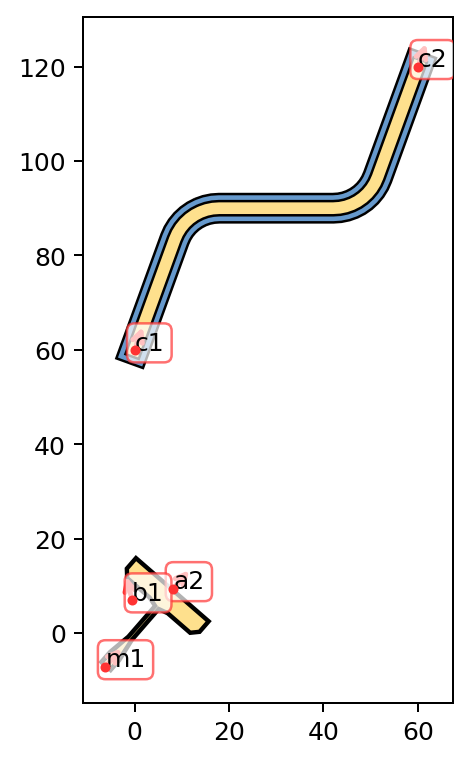

In [27]:
pgate.append(r2)
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
#set_limits(ax=ax, coor=[0,0], dxdy=[30,30])
pgate.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

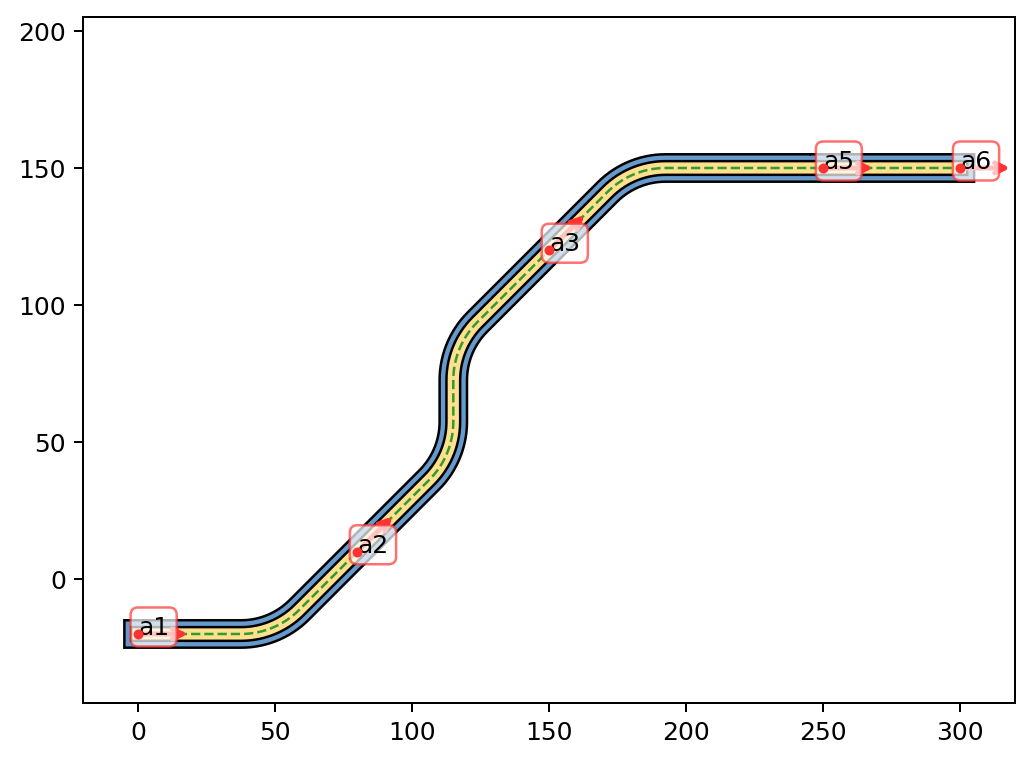

In [28]:
route_config = {"radius": 30, "num_segments": 16}

ss = SuperStructure(route_config)
ss.add_anchor([Anchor((0,-20), 0, "a1"),
               Anchor((80,10), 45.0000001, "a2"),
               Anchor((150,120), 45, "a3"),
               Anchor((250,150), 0, "a5"),
               Anchor((300,150), 00, "a6")])

ss.route(("a1", "a2", "a3"), layers={"top": 5, "gnd": 10})
ss.route(("a3", "a5", "a6"), layers={"top": 5, "gnd": 10})

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[150,80], dxdy=[340,250])
ss.plot(ax=ax, layer=["gnd", "top", "anchorsmod", "skeletone"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

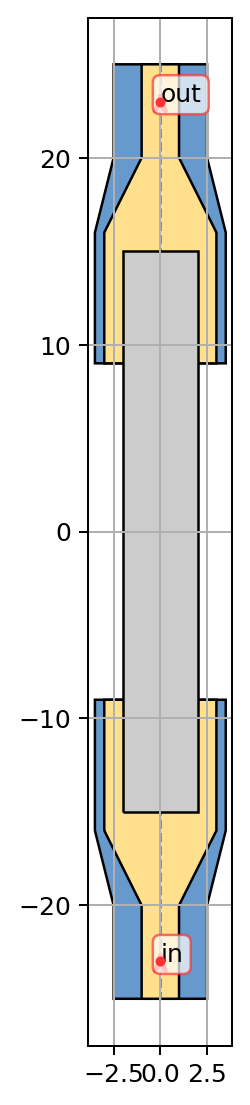

In [34]:
airb = {"w":4, "ol":2, "g":1, "l":30}

ab_opening = airb["w"] + airb["ol"]
ab_pad = ab_opening + airb["ol"]

ab = Taper(length = 4,
           layers = {"top": (6, 2),
                     "gnd": (7, 5)},
           alabel=("a1", "a2"))
ab.get_anchor("a1").move(xoff=4)
ab.get_anchor("a2").move(xoff=-2)
ab.moveby_snap(anchor="a1", to_point=(0,0))
ab.add_layer("open", Square(ab_opening))
ab.add_layer("air", translate(Rectangle(airb["l"]/2, airb["w"]), (-airb["l"]/4 + airb["ol"])))
ab.rotate(90)
ab.moveby(xy=(0, airb["l"]/2 - airb["ol"]))
ab.mirror(aroundaxis="x", update_labels=True, keep_original=True)
ab.remove_anchor(["a1", "a1_m"])

ab_main = ab.copy()
ab_main.modify_anchor(label="a2", new_name="out")
ab_main.modify_anchor(label="a2_m", new_name="in", new_direction=90)

ab.remove_anchor(["a2", "a2_m"])

fig = plt.figure(1, figsize=SIZE_L, dpi=90)
ax = fig.add_subplot(111)
ab_main.plot(ax=ax, layer=["gnd", "top", "anchorsmod", "skeletone", "air"], color=colorlist, draw_direction=True)
#plot_polygon(airbridge.open, ax=ax, add_points=False, facecolor=None, edgecolor=RED, ls="-", lw=2)
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

ab.skeletone = MultiLineString()

using smaller radius for routing


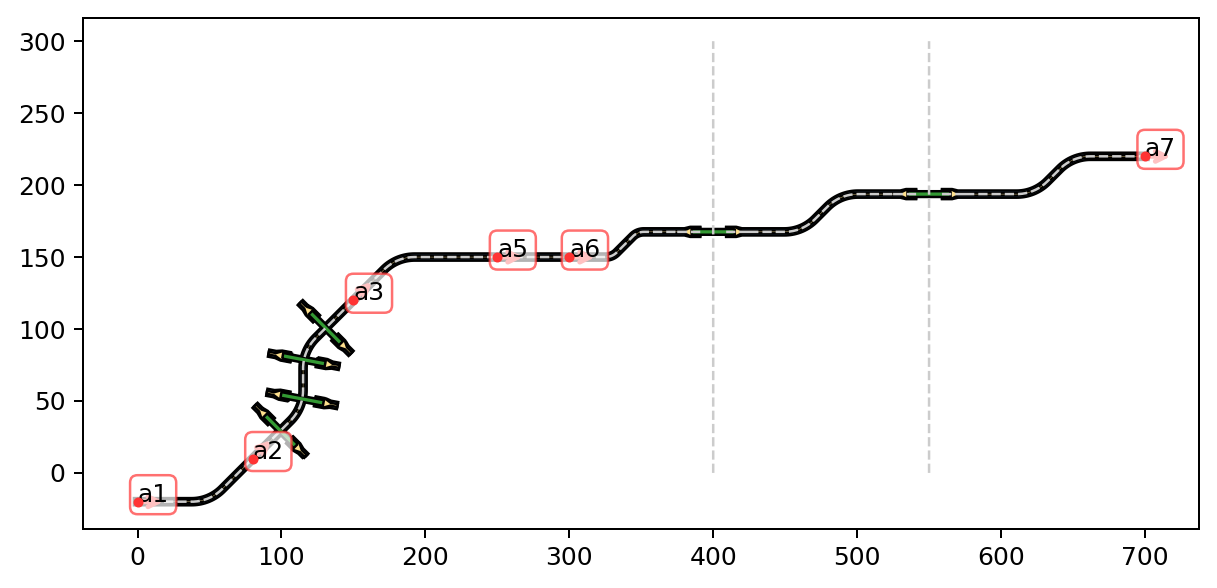

In [38]:
route_config = {"radius": 30, "num_segments": 20}

ss = SuperStructure(route_config)
ss.add_anchor([Anchor((0,-20), 0, "a1"),
               Anchor((80,10), 45, "a2"),
               Anchor((150,120), 45, "a3"),
               Anchor((250,150), 0, "a5"),
               Anchor((300,150), 00, "a6")])

ss.route(("a1", "a2", "a3"), layers={"top": 2, "gnd": 5})
ss.route(("a3", "a5", "a6"), layers={"top": 2, "gnd": 5})
#ss.scale(5, 5)

ss.add_along_skeletone(bound_anchors=("a2", "a3"), num=4, structure=ab)
ss.fix_line()
ss.skeletone = unary_union([ss.skeletone, 
                            LineString([(400, 0), (400, 300)]), 
                            LineString([(550, 0), (550, 300)])])

ss.add_anchor(Anchor((700, 220), 0, "a7"))

ss.route_with_intersection(("a6", "a7"), layers={"top": 2, "gnd": 5}, airbridge=ab_main)

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
#set_limits(ax=ax, coor=[475,150], dxdy=[350,150])
ss.plot(ax=ax, layer=["gnd", "top", "anchorsmod", "air", "skeletone"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
#plt.grid()
plt.show()